# Airplane Customers Satisfaction Analysis 
### Dataset courtesy [Maven Analytics](https://www.mavenanalytics.io/data-playground?accessType=open&dataStructure=5wfxyeVf1etbP4TXdyPdG1)


### Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience. 
### This analysis is to analyze how each factors affects the customers satisfaction.



In [1]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# data dictionary
data_dict = pd.read_csv("data_dictionary.csv")

data_dict.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Field,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service
Description,Unique passenger identifier,Gender of the passenger (Female/Male),Age of the passenger,Type of airline customer (First-time/Returning),Purpose of the flight (Business/Personal),Travel class in the airplane for the passenger...,Flight distance in miles,Flight departure delay in minutes,Flight arrival delay in minutes,Satisfaction level with the convenience of the...,Satisfaction level with the online booking exp...,Satisfaction level with the check-in service f...,Satisfaction level with the online boarding ex...,Satisfaction level with the gate location in t...,Satisfaction level with the on-boarding servic...,Satisfaction level with the comfort of the air...,Satisfaction level with the leg room of the ai...,Satisfaction level with the cleanliness of the...,Satisfaction level with the food and drinks on...,Satisfaction level with the in-flight service ...


In [3]:
#import data
data = pd.read_csv("airline_passenger_satisfaction.csv")

data.head().T


,0,1,2,3,4
ID,1,2,3,4,5
Gender,Male,Female,Male,Male,Female
Age,48,35,41,50,49
Customer Type,First-time,Returning,Returning,Returning,Returning
Type of Travel,Business,Business,Business,Business,Business
Class,Business,Business,Business,Business,Business
Flight Distance,821,821,853,1905,3470
Departure Delay,2,26,0,0,0
Arrival Delay,5.0,39.0,0.0,0.0,1.0
Departure and Arrival Time Convenience,3,2,4,2,3


In [4]:
#Check for missing data

data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

#### Only Arrival has missing 393 missing values


In [5]:
data[pd.isnull(data["Arrival Delay"])]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


### Missing data could be a result of human error, thus we'd replace NaN with 0 which means "Not Applicable"

In [7]:
# replace missing data
data["Arrival Delay"] = data["Arrival Delay"].replace(np.nan, 0)

In [8]:
#Check for missing data

data.isnull().sum()


ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [16]:
#Check unique values for all coulums

for i in data.columns:
    print(i)
    print(data[i].unique())

ID
[     1      2      3 ... 129878 129879 129880]
Gender
['Male' 'Female']
Age
[48 35 41 50 49 43 60 38 28 27 24  9 52 70 61 11 42 14 56 77 51 47 58 40
 21 33 39 54 46 45 23 20 44 37 36 57 31 53 25 55 72 19 65 32 80  7 34 18
 12 26 17 66 68 67 59 69 16 22 64 29 10 71 30 62 63  8 15 73 78 74 79 13
 76 75 85]
Customer Type
['First-time' 'Returning']
Type of Travel
['Business' 'Personal']
Class
['Business' 'Economy' 'Economy Plus']
Flight Distance
[ 821  853 1905 ... 1019 1161 1051]
Departure Delay
[   2   26    0   13   20   16   68    4   12    6   22   23   59   30
   29   40    1   19  151    7   10  324   50   45  254   72  101   18
   27   96   60  104   32   11  183   38    3  103   88   42   54  115
   56  265   66  117   58   41  166   44   55   49  134   52   31   36
   15   39   95  128   21   65   17    9   25  192   14   82  116   35
  193   51   80  158   92  165   74   43  123   62    5   33   34   70
   48   24   63   37   61   47    8   28  112   46  212   78   71  102
 

In [19]:
#check data types

data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


### Some of the data are ordinal but currently have a int data type, arrival delay should also be in int

In [20]:
#convert data types

dt = ["Departure and Arrival Time Convenience","Ease of Online Booking", "Check-in Service",
      "Online Boarding","Gate Location","On-board Service","Seat Comfort","Leg Room Service",
      "Cleanliness", "Food and Drink", "In-flight Service",  "In-flight Wifi Service","In-flight Entertainment",
      "Baggage Handling", "Satisfaction"]


data[dt] = data[dt].astype('str')

In [22]:
data["Arrival Delay"] = data["Arrival Delay"].astype("int")

In [23]:
data.dtypes

ID                                         int64
Gender                                    object
Age                                        int64
Customer Type                             object
Type of Travel                            object
Class                                     object
Flight Distance                            int64
Departure Delay                            int64
Arrival Delay                              int64
Departure and Arrival Time Convenience    object
Ease of Online Booking                    object
Check-in Service                          object
Online Boarding                           object
Gate Location                             object
On-board Service                          object
Seat Comfort                              object
Leg Room Service                          object
Cleanliness                               object
Food and Drink                            object
In-flight Service                         object
In-flight Wifi Servi

# Data Visualizations


## Age Distribution of Customers


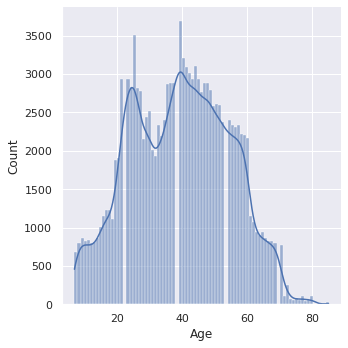

In [57]:
sns.displot(data, x="Age", kde=True)
plt.show()

## Customer Satisfied by Gender, Travel Type, Class and Customer Type 

/home/amazing-grace/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Customer Type'

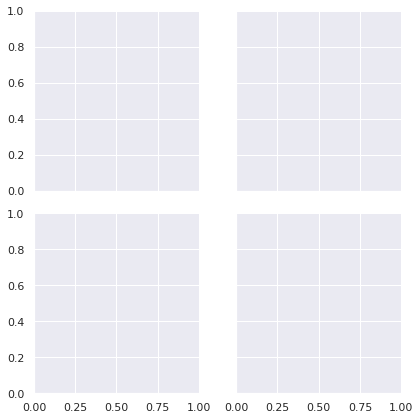

In [60]:
g = sns.FacetGrid(data, col="Gender", row="Type of Travel")
g.map(sns.countplot("Customer Type"))

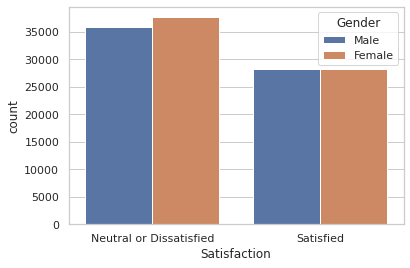

In [27]:
sns.countplot(x="Satisfaction", data=data, hue="Gender")

plt.show()

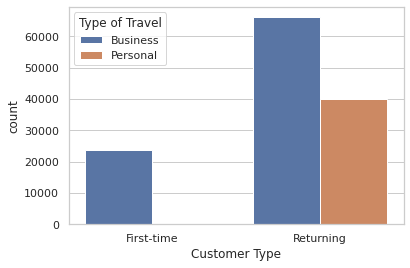

In [30]:
sns.countplot(x='Customer Type', data=data, hue="Type of Travel")
plt.show()

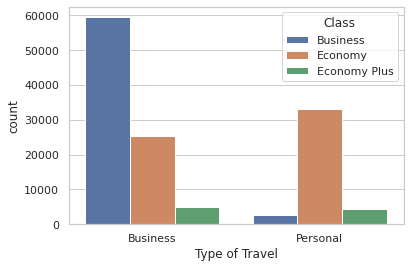

In [31]:
sns.countplot(x="Type of Travel", data=data, hue="Class")
plt.show()

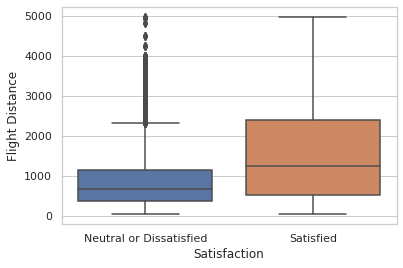

In [33]:
sns.boxplot(x="Satisfaction", y="Flight Distance", data= data)
plt.show()

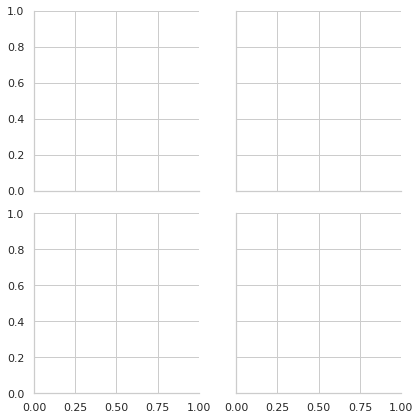